# O que são arquivos de imagem?

Assim como áudios, as imagens são representadas por **valores numéricos** no computador.

Uma das principais diferenças, contudo, é a forma como estes valores são estruturados:

**Arquivos de áudio**
- Vetores de 1 dimensão (para arquivos com áudio mono)
- Parâmetros: taxa de amostragem

**Arquivos de imagem**
- Vetores de pelo menos duas dimensões (altura e largura)
- Podem possuir terceira dimensão (canal de cor), no caso de imagens coloridas
- Parâmetros: profundidade de bit (bit-depth)

Vamos explorar um pouco mais sobre os arquivos de imagem usando datasets do HuggingFace: https://huggingface.co/datasets/microsoft/cats_vs_dogs

In [1]:
from datasets import load_dataset
data = load_dataset('cats_vs_dogs', split='train', streaming=True)

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\datasets--cats_vs_dogs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administra

In [2]:
for line in data.take(5):
    print(line)

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x20B7F76C110>, 'labels': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x281 at 0x20B7F7D2210>, 'labels': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x500 at 0x20B7F7D2330>, 'labels': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x500 at 0x20B7F7D2450>, 'labels': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x20B7F7D2570>, 'labels': 0}


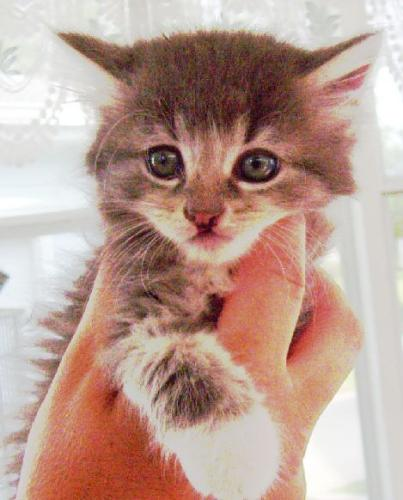

In [6]:
image = list(data.take(5))[3]['image']
image

## Entendendo imagens

As imagens desse conjunto estão no formato JPEG.

Isso significa que as imagens possuem 3 canais de cor - vermelho, verde e azul. Em outras palavras, estão no formato RBG.

In [8]:
image.format

'JPEG'

In [9]:
image.mode

'RGB'

Isto significa que as imagens são compostas por 3 matrizes, uma guardando os valores de cada canal de cor.

![Image](https://global.discourse-cdn.com/dlai/original/2X/7/743a6e319339e4c48b05f848334150e6ac02789a.png)

Cada uma das matrizes guarda valores entre 0 (sem nada daquela cor) e 255 (intensidade máxima daquela cor)

Dentro do computador, em binário, é preciso 8 valores 0 ou 1 para guardar esta informação em um canal de cor. Isso significa que cada canal de uma imagem é 8 bit.

O termo técnico para este fato é dizer que as imagens **JPEG** possuem **profundidade de bit** (bit depth) de 8 bits.

É possível pegar as dimensões da imagem também:

In [10]:
image.width

403

## Lendo os dados da imagem

Usamos a biblioteca numpy para extrair os valores numéricos da imagem:

In [11]:
import numpy as np

data_image = np.array(image)
data_image

array([[[223, 224, 219],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [246, 244, 249],
        [245, 243, 248],
        [243, 241, 246]],

       [[223, 224, 219],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [246, 245, 250],
        [246, 244, 249],
        [245, 243, 248]],

       [[222, 223, 218],
        [222, 223, 218],
        [222, 223, 218],
        ...,
        [246, 245, 250],
        [247, 246, 251],
        [248, 247, 252]],

       ...,

       [[208, 215, 221],
        [209, 217, 220],
        [207, 215, 218],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]],

       [[208, 215, 221],
        [209, 217, 220],
        [208, 216, 219],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]],

       [[209, 216, 222],
        [210, 218, 221],
        [208, 216, 219],
        ...,
        [216, 212, 209],
        [216, 212, 211],
        [216, 212, 211]]

In [13]:
data_image.shape

(500, 403, 3)

Vamos "desmembrar" cada canal e exibí-los com a biblioteca matplotlib:

In [14]:
data_r = data_image[:, :, 0]
data_g = data_image[:, :, 1]
data_b = data_image[:, :, 2]

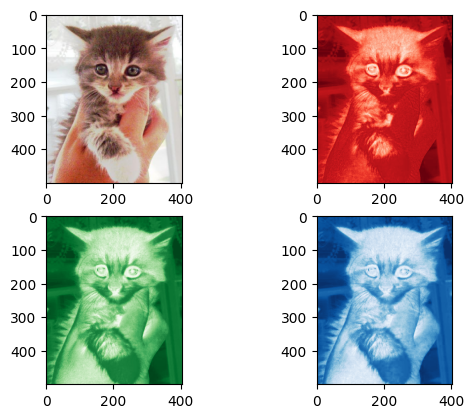

In [15]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)

ax1.imshow(image)
ax2.imshow(data_r, cmap='Reds')
ax3.imshow(data_g, cmap='Greens')
ax4.imshow(data_b, cmap='Blues')

plt.show()

Também podemos pensar em "cortes transversais" na imagem, onde dada uma posição, pegamos os valores de cada canal RGB.

Pelo Python, podemos também pegar o valor de um pixel específico:

In [16]:
pixel = data_image[200, 300, :]
pixel

array([170, 110, 102], dtype=uint8)

## Outros tipos de imagem

### Imagens preto e branco

Em geral, imagens preto e branco possuem um único canal de cor, isto é, são representadas por uma única matriz:

É possível converter imagens de 1 canal em 3 canais simplesmente replicando os canais (a aparência é a mesma, mas surgem mais matrizes)

### Outros canais de cor

Além dos canais RGB, imagens no formato .png frequentemente contém um último canal chamado de Alfa ou transparência, sendo assim imagens RGBA:

**RGBA Color Space**

![Image](https://upload.wikimedia.org/wikipedia/commons/0/0b/RGBA_comp.png)

### Outras profundidades de bit

Podemos ter imagens que guardam mais informações em cada canal, como 16 ou 32 bits. Em geral, os dados são armazenados como floats indo de 0.0 a 1.0

As diferenças de imagens de 8 bit para 16 ou 32 são visualmente imperceptíveis. Por isso, o padrão é utilizar imagens 8 bit para poupar espaço.

Dito isso, imagens com maior profundidade de bit são frequentemente utilizadas em trabalhos especializados onde a precisão é crucial, como edição de imagens digitais ou análise de imagens.

# Classificação de Imagens

A classificação de imagens é uma das tarefas mais "tradicionais" de IAs.

Dada uma imagem, o modelo de IA deve classificá-la entre algumas categorias, como:

- Cachorro ou gato
- Comida: pizza, batata frita ou cachorro quente,
- Cômodos: X, Y ou Z

Vamos ver como realizar classificação com os modelos do HuggingFace. Para isso, vamos usar este dataset: https://huggingface.co/datasets/Bingsu/Cat_and_Dog

In [17]:
from datasets import load_dataset

data = load_dataset('Bingsu/Cat_and_Dog', split='test')

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\datasets--Bingsu--Cat_and_Dog. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 21726.85 examples/s]


In [18]:
lines = data.shuffle()[:10]

In [20]:
def exhibit_image(image):
    image = image.copy()
    image.thumbnail((250,250))
    
    display(image)

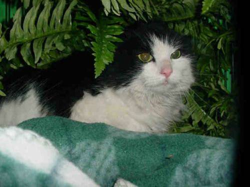

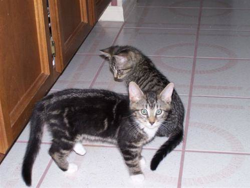

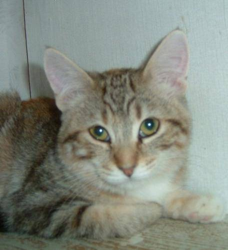

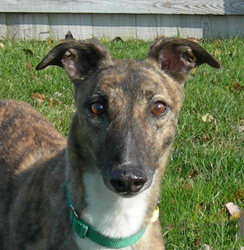

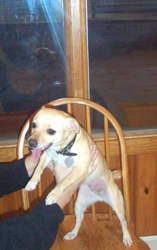

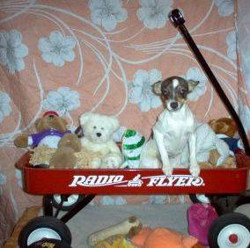

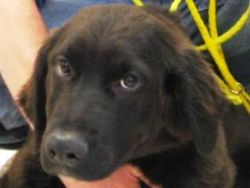

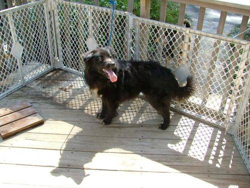

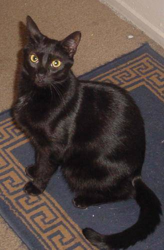

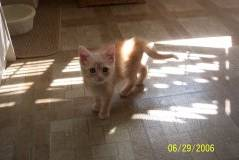

In [21]:
for image in lines['image']:
    exhibit_image(image)

Vamos utilizar este modelo treinado para classificar cachorros e gatos: https://huggingface.co/akahana/vit-base-cats-vs-dogs

In [22]:
from transformers import pipeline
model = 'akahana/vit-base-cats-vs-dogs'
classifier = pipeline('image-classification', model=model)

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\models--akahana--vit-base-cats-vs-dogs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


[{'label': 'cat', 'score': 0.998723566532135}, {'label': 'dog', 'score': 0.0012763792183250189}]


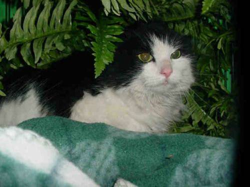





[{'label': 'cat', 'score': 0.9986099004745483}, {'label': 'dog', 'score': 0.0013900288613513112}]


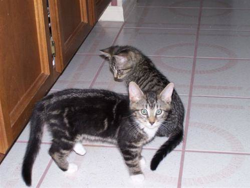





[{'label': 'cat', 'score': 0.9987754225730896}, {'label': 'dog', 'score': 0.0012245886027812958}]


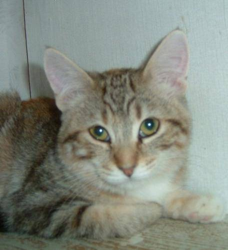





[{'label': 'dog', 'score': 0.998611569404602}, {'label': 'cat', 'score': 0.0013884592335671186}]


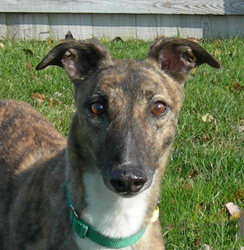





[{'label': 'dog', 'score': 0.9981151819229126}, {'label': 'cat', 'score': 0.001884878147393465}]


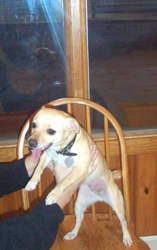





[{'label': 'dog', 'score': 0.9371868968009949}, {'label': 'cat', 'score': 0.06281306594610214}]


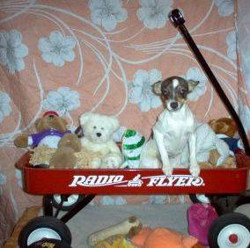





[{'label': 'dog', 'score': 0.9986856579780579}, {'label': 'cat', 'score': 0.0013143903343006968}]


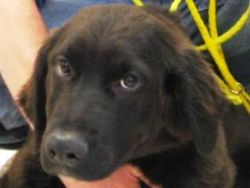





[{'label': 'dog', 'score': 0.9905444383621216}, {'label': 'cat', 'score': 0.009455532766878605}]


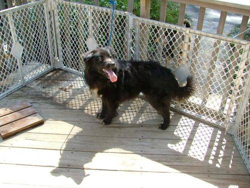





[{'label': 'cat', 'score': 0.9988110065460205}, {'label': 'dog', 'score': 0.001188955968245864}]


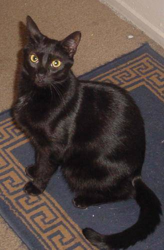





[{'label': 'cat', 'score': 0.9812332391738892}, {'label': 'dog', 'score': 0.018766796216368675}]


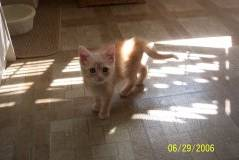

In [23]:
for image in lines['image']:
    prediction = classifier(image)
    print(prediction)
    exhibit_image(image)
    
    print('\n\n====================\n\n')

In [24]:
from pathlib import Path
from PIL import Image

dog_images = [Image.open(file) for file in Path('images/dogs').iterdir()]

In [25]:
dog_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1600>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1280>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=342x380>]

[{'label': 'dog', 'score': 0.9734756350517273}, {'label': 'cat', 'score': 0.026524405926465988}]


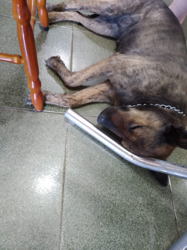





[{'label': 'dog', 'score': 0.9983647465705872}, {'label': 'cat', 'score': 0.0016352767124772072}]


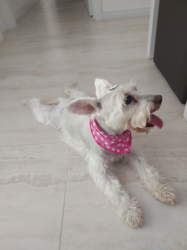





[{'label': 'dog', 'score': 0.9974910020828247}, {'label': 'cat', 'score': 0.002508999314159155}]


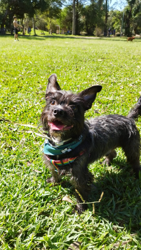





[{'label': 'dog', 'score': 0.9834120273590088}, {'label': 'cat', 'score': 0.01658795028924942}]


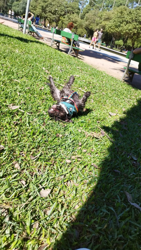





[{'label': 'dog', 'score': 0.9963834285736084}, {'label': 'cat', 'score': 0.0036165753845125437}]


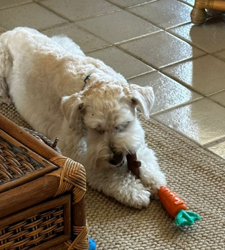

In [27]:
for image in dog_images:
    prediction = classifier(image)
    print(prediction)
    exhibit_image(image)
    
    print('\n\n====================\n\n')

### Classificador de comida
https://huggingface.co/nateraw/food

In [28]:
model = 'nateraw/food'
classifier = pipeline('image-classification', model=model)

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\models--nateraw--food. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


[{'label': 'french_fries', 'score': 0.9961793422698975}, {'label': 'poutine', 'score': 0.00021627558453474194}, {'label': 'onion_rings', 'score': 0.0001858264731708914}, {'label': 'hamburger', 'score': 0.00016602108371444046}, {'label': 'fish_and_chips', 'score': 9.228346607415006e-05}]


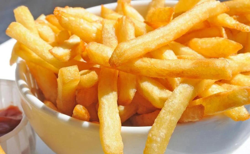





[{'label': 'churros', 'score': 0.1431814432144165}, {'label': 'hot_and_sour_soup', 'score': 0.12699055671691895}, {'label': 'french_onion_soup', 'score': 0.06101788952946663}, {'label': 'panna_cotta', 'score': 0.05992981791496277}, {'label': 'miso_soup', 'score': 0.04499141871929169}]


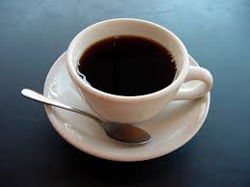





[{'label': 'filet_mignon', 'score': 0.9797660708427429}, {'label': 'steak', 'score': 0.005324847996234894}, {'label': 'prime_rib', 'score': 0.00045030820183455944}, {'label': 'beef_carpaccio', 'score': 0.00040969211841002107}, {'label': 'beef_tartare', 'score': 0.0003699938242789358}]


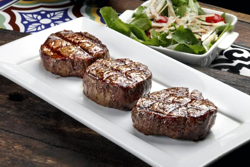





[{'label': 'pizza', 'score': 0.9971049427986145}, {'label': 'garlic_bread', 'score': 0.00014898134395480156}, {'label': 'bruschetta', 'score': 0.0001280375145142898}, {'label': 'omelette', 'score': 8.780448115430772e-05}, {'label': 'beef_carpaccio', 'score': 7.792931864969432e-05}]


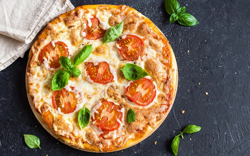





[{'label': 'greek_salad', 'score': 0.9915577173233032}, {'label': 'caprese_salad', 'score': 0.0013854320859536529}, {'label': 'caesar_salad', 'score': 0.001008915831334889}, {'label': 'beet_salad', 'score': 0.0005722725763916969}, {'label': 'seaweed_salad', 'score': 0.0002362963859923184}]


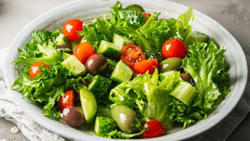





[{'label': 'pizza', 'score': 0.08768478035926819}, {'label': 'omelette', 'score': 0.03640269488096237}, {'label': 'cheesecake', 'score': 0.026002127677202225}, {'label': 'apple_pie', 'score': 0.024814844131469727}, {'label': 'beignets', 'score': 0.02400505542755127}]


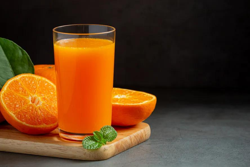

In [29]:
food_images = [Image.open(file) for file in Path('images/foods').iterdir()]

for image in food_images:
    prediction = classifier(image)
    print(prediction)
    exhibit_image(image)
    
    print('\n\n====================\n\n')

Prediction: french_fries, score = 99.62%


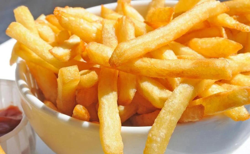





The model wasn't confident enough to classify this image, score = 14.32%


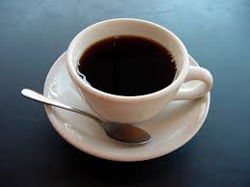





Prediction: filet_mignon, score = 97.98%


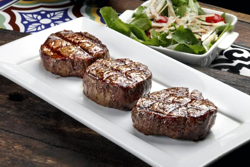





Prediction: pizza, score = 99.71%


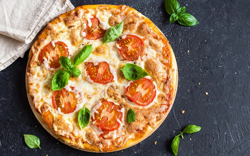





Prediction: greek_salad, score = 99.16%


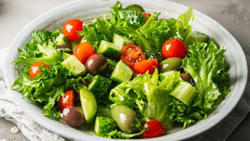





The model wasn't confident enough to classify this image, score = 8.77%


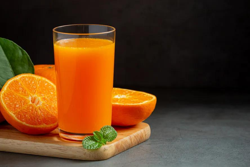

In [31]:
THRESHOLD = 0.5

food_images = [Image.open(file) for file in Path('images/foods').iterdir()]

for image in food_images:
    prediction = classifier(image)
    
    best_prediction = prediction[0]
    food = best_prediction['label']
    score = best_prediction['score']
    
    formatted_score = f'{score * 100:.2f}%'
    if score < THRESHOLD:
        print(f"The model wasn't confident enough to classify this image, score = {formatted_score}")
    else:
        print(f'Prediction: {food}, score = {formatted_score}')
    
    exhibit_image(image)
    
    print('\n\n====================\n\n')

### Classificador de ambientes e imóveis

https://huggingface.co/andupets/real-estate-image-classification

In [32]:
model = 'andupets/real-estate-image-classification'
classifier = pipeline('image-classification', model=model)

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\models--andupets--real-estate-image-classification. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


Prediction: bathroom, score = 91.46%


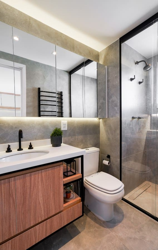





Prediction: bathroom, score = 94.06%


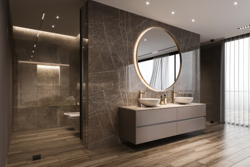





Prediction: house facade, score = 93.05%


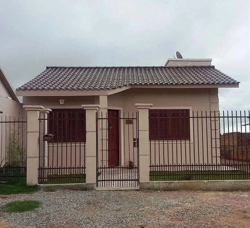





Prediction: kitchen, score = 93.02%


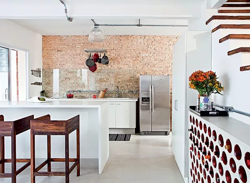





Prediction: house facade, score = 94.08%


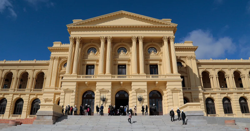





Prediction: dining room, score = 83.62%


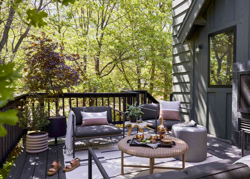





Prediction: sao paulo apartment facade, score = 91.85%


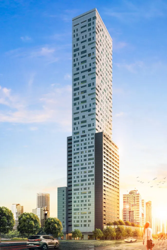





Prediction: house facade, score = 90.35%


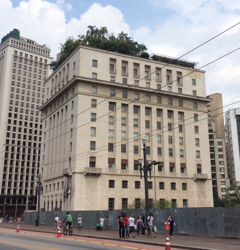





Prediction: living room, score = 92.97%


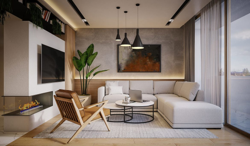





Prediction: living room, score = 89.09%


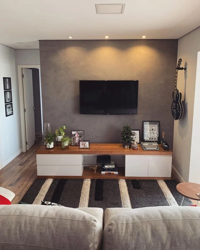





Prediction: living room, score = 90.78%


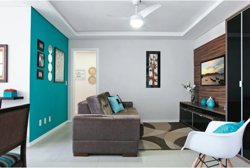

In [34]:
THRESHOLD = 0.5

real_estate_images = [Image.open(file) for file in Path('images/houses').iterdir()]

for image in real_estate_images:
    prediction = classifier(image)
    
    best_prediction = prediction[0]
    room = best_prediction['label']
    score = best_prediction['score']
    
    formatted_score = f'{score * 100:.2f}%'
    if score < THRESHOLD:
        print(f"The model wasn't confident enough to classify this image, score = {formatted_score}")
    else:
        print(f'Prediction: {room}, score = {formatted_score}')
    
    exhibit_image(image)
    
    print('\n\n====================\n\n')

# Classificação de Imagens Zero-Shot

Assim como para áudios, podemos classificar imagens com a estratégia **zero-shot**, isto é, passando nós mesmos os nomes de objetos ou de coisas que o modelo deve identificar.

Vamos testar esta tarefa com o seguinte modelo: https://huggingface.co/openai/clip-vit-large-patch14

In [35]:
model = 'openai/clip-vit-large-patch14'
classifier = pipeline('zero-shot-image-classification', model=model)

c:\Users\annaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annaf\.cache\huggingface\hub\models--openai--clip-vit-large-patch14. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [50]:
def exhibit_image(image):
    image = image.copy()
    image.thumbnail((250,250))
    
    display(image)

In [55]:
path = 'images/animals'

images = [Image.open(file) for file in Path(path).iterdir()]

In [56]:
classes = [
    'wolf',
    'tiger',
    'dog',
    'cat',
    'puma',
    'turtle',
    'bird',
]

--- Predictions ---

wolf: 82.12%
dog: 12.82%
tiger: 4.51%
cat: 0.29%
puma: 0.18%
bird: 0.06%
turtle: 0.03%


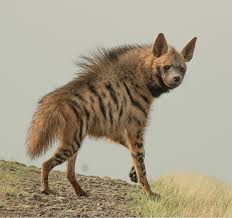





--- Predictions ---

wolf: 86.66%
dog: 12.52%
tiger: 0.27%
bird: 0.24%
cat: 0.18%
puma: 0.12%
turtle: 0.00%


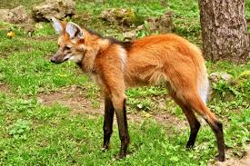





--- Predictions ---

puma: 99.34%
wolf: 0.31%
tiger: 0.23%
cat: 0.12%
dog: 0.00%
bird: 0.00%
turtle: 0.00%


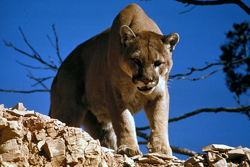





--- Predictions ---

tiger: 97.73%
puma: 1.34%
cat: 0.66%
wolf: 0.18%
dog: 0.04%
turtle: 0.03%
bird: 0.02%


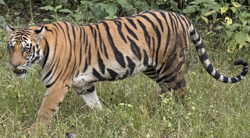





--- Predictions ---

puma: 81.22%
tiger: 9.45%
cat: 8.92%
wolf: 0.35%
dog: 0.03%
bird: 0.02%
turtle: 0.00%


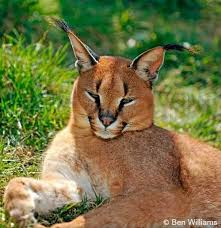





--- Predictions ---

wolf: 76.40%
dog: 21.66%
tiger: 1.55%
puma: 0.22%
cat: 0.09%
bird: 0.07%
turtle: 0.02%


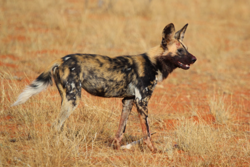

In [57]:
for image in images:
    prediction = classifier(image, candidate_labels=classes)
    print('--- Predictions ---\n')
    
    for p in prediction:
        label = p['label']
        score = p['score']
        adjusted_score = f'{100 * score:.2f}%'
        
        print(f'{label}: {adjusted_score}')
    
    exhibit_image(image)
    print('\n\n====================\n\n')

--- Predictions ---

luxury bathroom: 68.81%
common bathroom: 30.32%
luxury kitchen: 0.64%
common kitchen: 0.17%
common living room: 0.02%
luxury living room: 0.01%
small building: 0.01%
outdoor room: 0.01%
tall building: 0.00%
common building: 0.00%
old building: 0.00%
museum: 0.00%


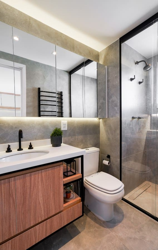





--- Predictions ---

luxury bathroom: 95.37%
common bathroom: 4.30%
luxury kitchen: 0.19%
luxury living room: 0.11%
common kitchen: 0.01%
common living room: 0.01%
outdoor room: 0.00%
common building: 0.00%
tall building: 0.00%
small building: 0.00%
museum: 0.00%
old building: 0.00%


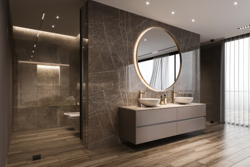





--- Predictions ---

small building: 77.00%
common building: 9.70%
common bathroom: 3.94%
outdoor room: 3.11%
old building: 2.86%
common kitchen: 1.68%
luxury bathroom: 0.77%
museum: 0.49%
luxury kitchen: 0.23%
tall building: 0.19%
common living room: 0.02%
luxury living room: 0.02%


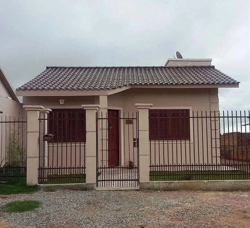





--- Predictions ---

luxury kitchen: 64.91%
common kitchen: 33.77%
common living room: 0.68%
luxury living room: 0.19%
common bathroom: 0.13%
old building: 0.10%
small building: 0.08%
luxury bathroom: 0.06%
tall building: 0.04%
outdoor room: 0.02%
common building: 0.02%
museum: 0.00%


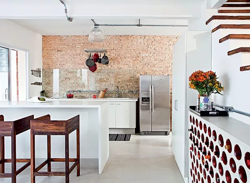





--- Predictions ---

museum: 34.99%
common building: 28.09%
old building: 23.45%
tall building: 5.36%
small building: 2.21%
luxury living room: 1.83%
common bathroom: 1.12%
luxury bathroom: 1.06%
luxury kitchen: 0.67%
outdoor room: 0.54%
common kitchen: 0.35%
common living room: 0.34%


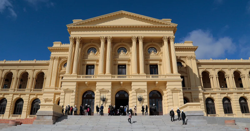





--- Predictions ---

outdoor room: 99.55%
common living room: 0.22%
luxury living room: 0.16%
common bathroom: 0.02%
luxury kitchen: 0.02%
common kitchen: 0.01%
luxury bathroom: 0.01%
common building: 0.00%
small building: 0.00%
old building: 0.00%
tall building: 0.00%
museum: 0.00%


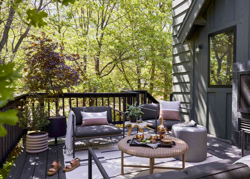





--- Predictions ---

tall building: 99.18%
common building: 0.42%
small building: 0.15%
luxury living room: 0.14%
luxury kitchen: 0.03%
common living room: 0.02%
old building: 0.02%
outdoor room: 0.02%
luxury bathroom: 0.01%
common kitchen: 0.01%
common bathroom: 0.00%
museum: 0.00%


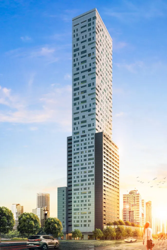





--- Predictions ---

old building: 43.76%
common building: 35.26%
tall building: 13.09%
small building: 3.94%
museum: 3.87%
outdoor room: 0.05%
luxury living room: 0.01%
common living room: 0.01%
common kitchen: 0.01%
luxury kitchen: 0.00%
common bathroom: 0.00%
luxury bathroom: 0.00%


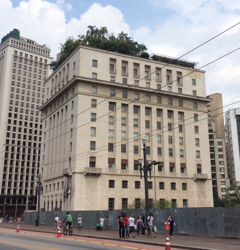





--- Predictions ---

luxury living room: 78.11%
common living room: 20.64%
luxury kitchen: 0.48%
outdoor room: 0.40%
common kitchen: 0.18%
luxury bathroom: 0.07%
common building: 0.05%
common bathroom: 0.04%
small building: 0.02%
old building: 0.01%
tall building: 0.00%
museum: 0.00%


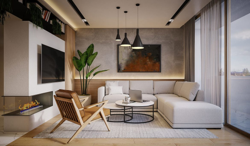





--- Predictions ---

common living room: 54.49%
luxury living room: 43.58%
common kitchen: 0.97%
luxury kitchen: 0.39%
outdoor room: 0.20%
common bathroom: 0.12%
tall building: 0.11%
small building: 0.04%
common building: 0.04%
luxury bathroom: 0.03%
old building: 0.02%
museum: 0.01%


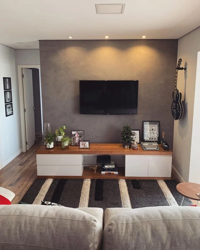





--- Predictions ---

common living room: 67.19%
luxury living room: 29.05%
outdoor room: 2.88%
common kitchen: 0.44%
common bathroom: 0.14%
luxury kitchen: 0.13%
small building: 0.09%
luxury bathroom: 0.04%
old building: 0.02%
tall building: 0.01%
common building: 0.01%
museum: 0.01%


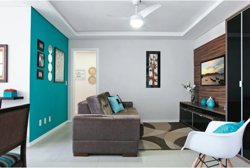

In [59]:
classes = [
    'common bathroom',
    'luxury bathroom',
    'common living room',
    'luxury living room',
    'common kitchen',
    'luxury kitchen',
    'outdoor room',
    'common building',
    'tall building',
    'old building',
    'small building',
    'museum'
]

path = 'images/houses'

images = [Image.open(file) for file in Path(path).iterdir()]

for image in images:
    prediction = classifier(image, candidate_labels=classes)
    print('--- Predictions ---\n')
    
    for p in prediction:
        label = p['label']
        score = p['score']
        adjusted_score = f'{100 * score:.2f}%'
        
        print(f'{label}: {adjusted_score}')
    
    exhibit_image(image)
    print('\n\n====================\n\n')


--- Predictions ---

a dog sleeping: 90.02%
a dog resting on the ground: 9.87%
a dog chewing on a toy: 0.06%
a dog barking: 0.04%
a dog having fun outdoors: 0.00%


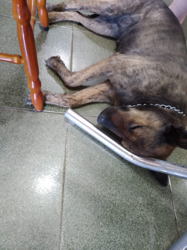





--- Predictions ---

a dog resting on the ground: 95.61%
a dog sleeping: 2.40%
a dog barking: 1.92%
a dog having fun outdoors: 0.05%
a dog chewing on a toy: 0.02%


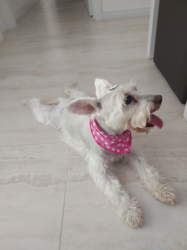





--- Predictions ---

a dog having fun outdoors: 70.24%
a dog barking: 23.99%
a dog resting on the ground: 4.54%
a dog chewing on a toy: 1.14%
a dog sleeping: 0.08%


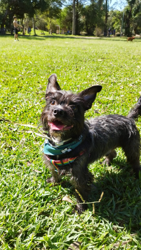





--- Predictions ---

a dog having fun outdoors: 63.30%
a dog resting on the ground: 32.33%
a dog barking: 3.05%
a dog sleeping: 1.25%
a dog chewing on a toy: 0.07%


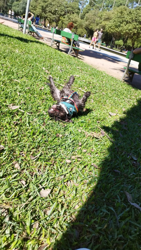





--- Predictions ---

a dog chewing on a toy: 99.63%
a dog barking: 0.22%
a dog resting on the ground: 0.09%
a dog having fun outdoors: 0.04%
a dog sleeping: 0.02%


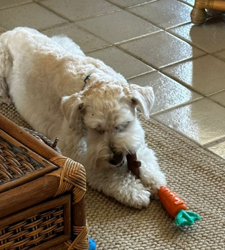

In [60]:
classes = [
    'a dog resting on the ground',
    'a dog sleeping',
    'a dog having fun outdoors',
    'a dog barking',
    'a dog chewing on a toy'
]

path = 'images/dogs'

images = [Image.open(file) for file in Path(path).iterdir()]

for image in images:
    prediction = classifier(image, candidate_labels=classes)
    print('--- Predictions ---\n')
    
    for p in prediction:
        label = p['label']
        score = p['score']
        adjusted_score = f'{100 * score:.2f}%'
        
        print(f'{label}: {adjusted_score}')
    
    exhibit_image(image)
    print('\n\n====================\n\n')
